In [1]:
%matplotlib inline


# Build image pyramids


The ``pyramid_gaussian`` function takes an image and yields successive images
shrunk by a constant scale factor. Image pyramids are often used, e.g., to
implement algorithms for denoising, texture discrimination, and scale-invariant
detection.




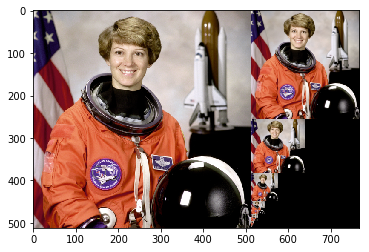

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian


image = data.astronaut()
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, )) # multichannel=True

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()